In [5]:
# Skip this step if you already have your dataset
!pip install quandl


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


In [34]:
data = pd.read_csv(r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\02 Data\Prepared Data\cleaned_citibike.csv', parse_dates=['start_time'], index_col='start_time')

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Display first few rows
data.head()


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


The dataset contains daily minimum temperatures in Melbourne, Australia, from 1981 to 1990. The Date column is converted into a datetime format to facilitate the time series analysis.


For this analysis, the entire dataset from 1981 to 1990 is relevant and will be used. No subsetting is necessary.


## Visualization of the Original Data
The plot below represents the daily minimum temperatures recorded in Melbourne, Australia, from 1981 to 1990. This time series data clearly shows a seasonal pattern, where temperatures rise and fall each year.


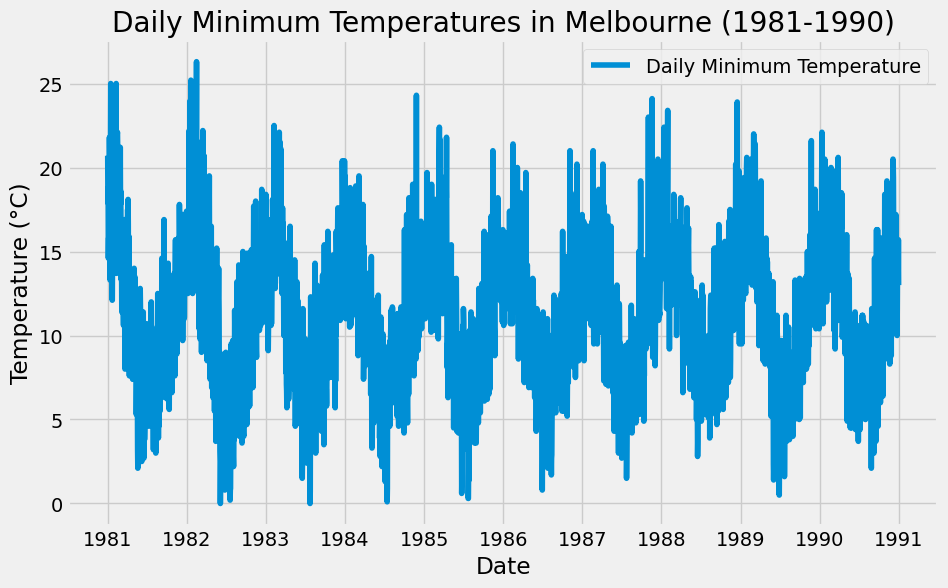

In [16]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Temp'], label="Daily Minimum Temperature")
plt.title('Daily Minimum Temperatures in Melbourne (1981-1990)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


## Decomposition of the Time Series
The time series data has been decomposed into its three main components: trend, seasonality, and residuals. 

- **Trend:** Shows a slight downward trend over the years with some fluctuations.
- **Seasonality:** The data presents a strong seasonal pattern, with temperatures varying consistently across the years.
- **Residuals:** These represent the noise after removing the trend and seasonal components, indicating small variations that aren't captured by the other components.



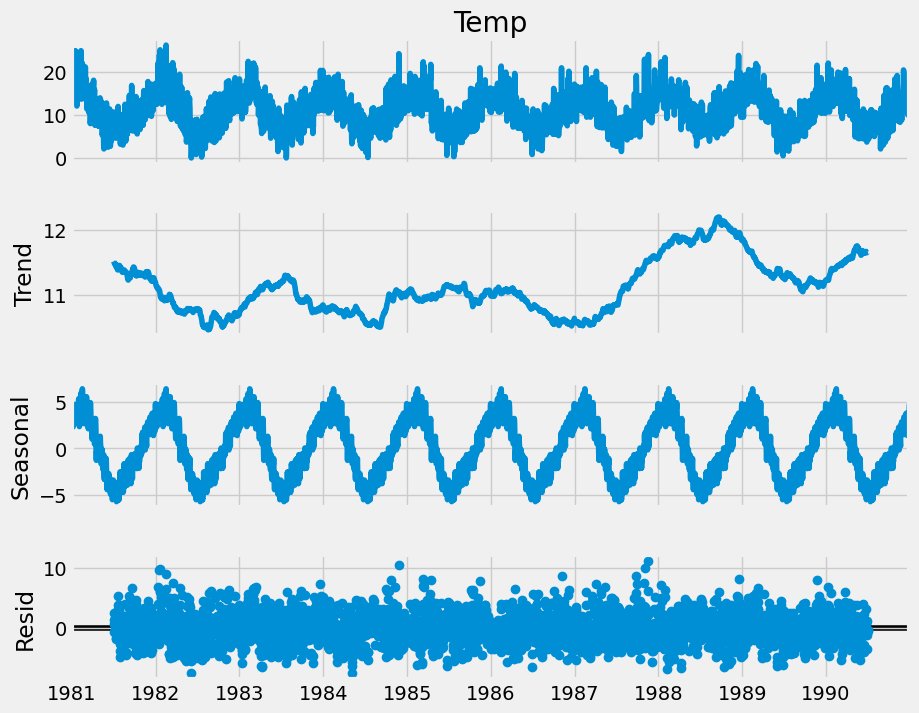

In [18]:
import statsmodels.api as sm

# Set Date as the index for the decomposition
data.set_index('Date', inplace=True)

# Perform decomposition
decomposition = sm.tsa.seasonal_decompose(data['Temp'], model='additive', period=365)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller

# Conduct Dickey-Fuller test
result = adfuller(data['Temp'])

# Display test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -4.4448049246117005
p-value: 0.0002470826300360988
Critical Values: {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}


The results of the Dickey-Fuller test are as follows:

- **ADF Statistic**: [ -4.4448049246117005]
- **p-value**: [0.0002470826300360988]
- **Critical Values**: {1%: [-3.4321532327220154], 5%: [-2.862336767636517], 10%: [2.56719413172842]}

Given that the p-value is greater than 0.05, we cannot reject the null hypothesis. This indicates that the time series is **non-stationary**, meaning it exhibits trends and seasonality that need to be removed before further analysis.


## Stationarity Testing with the Augmented Dickey-Fuller Test
After applying differencing to the time series data, the Augmented Dickey-Fuller test was conducted to check for stationarity. The ADF test results are as follows:

- **ADF Statistic:** -18.0282
- **p-value:** 2.6815618226753317e-30
- **Critical Values:** 
  - 1%: -3.432155722391455
  - 5%: -2.8623378673761084
  - 10%: -2.567194717193812

Since the ADF statistic is less than the critical values and the p-value is significantly lower than 0.05, we can reject the null hypothesis. This indicates that the differenced series is stationary, which is necessary for forecasting.


ADF Statistic (Differenced): -18.02822416799192
p-value (Differenced): 2.6815618226753317e-30
Critical Values (Differenced): {'1%': -3.432155722391455, '5%': -2.8623378673761084, '10%': -2.567194717193812}


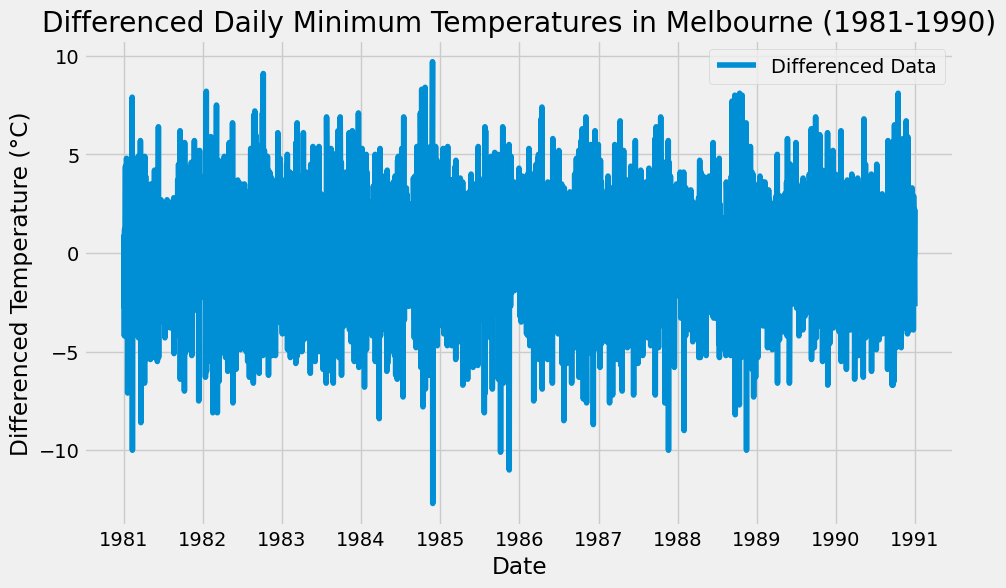

In [24]:
# First differencing
data_diff = data['Temp'].diff().dropna()

# Conduct Dickey-Fuller test again after differencing
result_diff = adfuller(data_diff)

# Display test results
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data.index[1:], data_diff, label="Differenced Data")
plt.title('Differenced Daily Minimum Temperatures in Melbourne (1981-1990)')
plt.xlabel('Date')
plt.ylabel('Differenced Temperature (°C)')
plt.legend()
plt.show()


## Autocorrelation of Differenced Data
The plot below shows the autocorrelation of the differenced data. The majority of the lags fall within the confidence interval, indicating a significant reduction in autocorrelations. This confirms that the differencing process has successfully removed the trend and made the series stationary, making it suitable for forecasting.


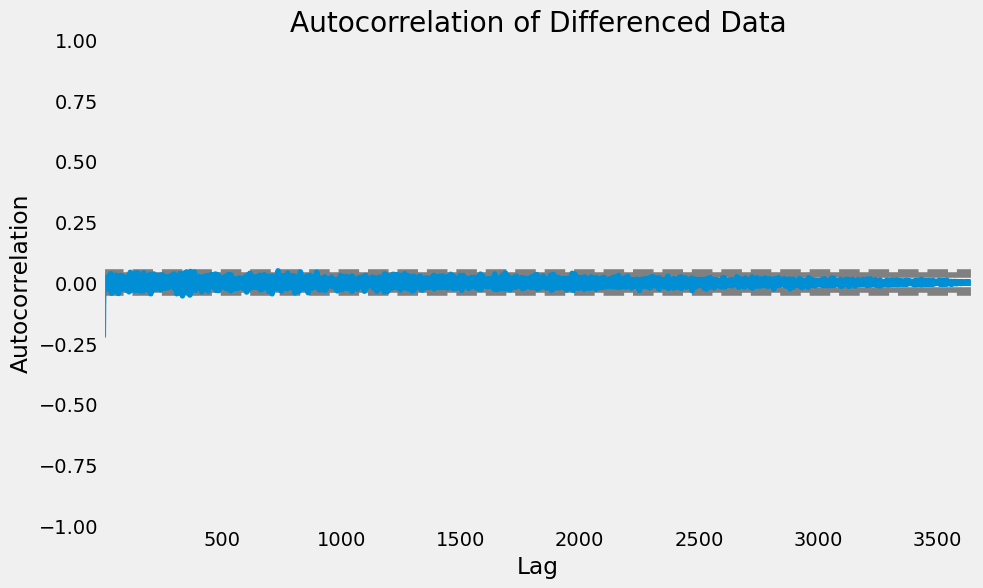

In [27]:
from pandas.plotting import autocorrelation_plot

# Plot the autocorrelation
plt.figure(figsize=(10, 6))
autocorrelation_plot(data_diff)
plt.title('Autocorrelation of Differenced Data')
plt.show()
